In this notebook the Grüneisen parameter for lake Tanganyika will be calculated.

In [1]:
from scipy.integrate import quad
from scipy.integrate import simps
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

The Grüneisen parameter is defined as follows:

In [2]:
#G = (alpha * c_s**2) / C_p

https://www.researchgate.net/publication/227122680_The_Equation_of_State_of_Lakes: The least squares best fit of the total salinity as a function of depth (z) gives (std. dev. 0.005):

In [3]:
# salinity as a function of dept lake Tanganyika
# salinity = 0.578 + 1.28305 * 10**(-1) * z - 7.32604 * 10**(-5) * z**2

depth_list = []
salinity_list = []

for i in range(0, 1500, 50):
    z = i
    salinity = 0.578 + (0.001 * 1.28305 * 10**(-1) * z) - (0.001 * 7.32604 * 10**(-5) * z**2)
    depth_list.append(z)
    salinity_list.append(salinity)

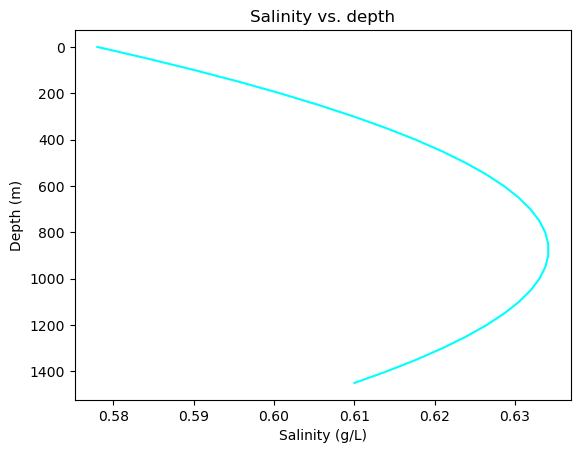

In [4]:
# plot the depth against the salinity in a graph
plt.plot(salinity_list, depth_list, color='cyan')

# Add labels and a title
plt.xlabel('Salinity (g/L)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

plt.title('Salinity vs. depth')

# Show the plot
plt.show()

The table is found in 'The Equation of State of Lakes' in table 6.

In [5]:
salinity_7 = [0.620, 0.621, 0.624, 0.632]
salinity_10 = [0.586, 0.595, 0.603, 0.613, 0.615, 0.621, 0.621]
salinity_11 = [0.571, 0.572, 0.589, 0.628, 0.633, 0.632, 0.627, 0.629, 0.625, 0.628, 0.627]
salinity_2 = [0.569, 0.616]
salinity_3 = [0.567, 0.620]
salinity_4 = [0.572, 0.619]

depth_7 = [250, 400, 700, 1220]
depth_10 = [100, 150, 200, 250, 300, 400, 500]
depth_11 = [5, 35, 60, 600, 700, 800, 900, 1000, 1100, 1200, 1300]
depth_2 = [5, 447]
depth_3 = [12, 359]
depth_4 = [5, 290]


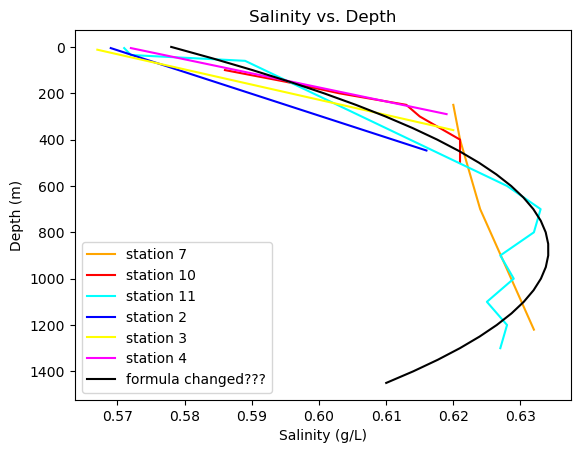

In [6]:
# plot the depth against the salinity in a graph
plt.plot(salinity_7, depth_7, color='orange', label='station 7')
plt.plot(salinity_10, depth_10, color='red', label='station 10')
plt.plot(salinity_11, depth_11, color='cyan', label='station 11')
plt.plot(salinity_2, depth_2, color='blue', label='station 2')
plt.plot(salinity_3, depth_3, color='yellow', label='station 3')
plt.plot(salinity_4, depth_4, color='magenta', label='station 4')

plt.plot(salinity_list, depth_list, color='black', label='formula changed???')

# Add labels and a title
plt.xlabel('Salinity (g/L)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

plt.legend()

plt.title('Salinity vs. Depth')

# Show the plot
plt.show()

In [7]:
temperature_1 = [27.34, 27.14, 26.15, 24.82, 24.14, 23.82, 23.66, 23.55, 23.47, 23.47, 23.44, 23.38, 23.37, 23.31, 23.33, 23.29, 23.30, 23.26, 23.25]
depth_1 = [5, 27, 45, 63, 91, 120, 144, 168, 187, 216, 250, 300, 350, 400, 450, 625, 721, 818, 867]

In [8]:
def salinity(z):
    S = 0.578 + (0.001 * 1.28305 * 10**(-1) * z) - (0.001* 7.32604 * 10**(-5) * z**2)
    return S

salinity_1 = []

for i in range(0, len(depth_1)):
    z = depth_1[i]
    calculated_salinity = salinity(z)
    salinity_1.append(calculated_salinity)

The density of the lake can be calculated with the formula from:
https://www.sciencedirect.com/science/article/pii/0198014981901229?ref=pdf_download&fr=RR-2&rr=806086102e8d0b56

In [9]:
C = 4.8314 * 10**(-4) 

def rho_0(T):
    rho_0 = 999.842594 + 6.793952 * 10**(-2) * (T) - 9.095290 * 10**(-3) * (T)**2 + 1.001685 * 10**(-4) * (T)**3 - 1.120083 * 10**(-6) * (T)**4 + 6.536336 * 10**(-9) * (T)**5
    return rho_0

def rho(A, B, T, C, S):
    rho = rho_0(T) + A * S + B * S**(1.5) + C * S
    return rho

In [10]:
density = []
difference = []

for i in range (0, len(temperature_1)):
    T = temperature_1[i]
    S = salinity_1[i]
    A = 8.24493 * 10**(-1) - 4.0899 * 10**(-3) * (T) + 7.6438 * 10**(-5) * (T)**2 - 8.2467 * 10**(-7) * (T)**3 + 5.3875 * 10**(-9) * (T)**4
    B = -5.72466 * 10**(-3) + 1.0227 * 10**(-4) * (T) - 1.6546 * 10**(-6) * (T)**2
    density.append(rho(A, B, T, C, S)) 
    
    delta = rho(A, B, T, C, S) - rho_0(T)
    difference.append(delta)

The following code is build so that the pressure at each step is calculated following the formula P=ρ⋅g⋅z and a form of very rough integration in steps. 

In [11]:
value_saved = 0

# The gravitational constant (in m/s)
gravitational_acceleration = 9.80665

def pressure(i):
    if i == 0:
        lower_half = 0
        upper_half = depth_1[i]
    else:
        # Determine how many meters should be calculated with what density
        lower_half = ((depth_1[i - 1] + depth_1[i]) / 2) - depth_1[i - 1]
        upper_half = depth_1[i] - ((depth_1[i - 1] + depth_1[i]) / 2)  
    
    lower_density = density[i - 1]    
    upper_density = density[i]
    
    pressure_step = lower_density * gravitational_acceleration * lower_half + upper_density * gravitational_acceleration * upper_half
    return pressure_step
    
pressure_steps = []

for i in range(0, len(depth_1)):
    pressure_one = pressure(i)
    pressure_steps.append(pressure_one)

# Total pressure starts at 100000 Pascal for the air pressure
total_pressure = 100000
pressure = []
    
for i in range(0, len(pressure_steps)):
    total_pressure = total_pressure + pressure_steps[i]
    
    # Divide by 100000 to get the pressure in bars
    pressure.append(total_pressure / 100000)

For alpha the following relation is found taking into account the temperature: https://www.researchgate.net/figure/The-volumetric-coefficient-of-thermal-expansion-of-water-as-a-function-of-temperature_fig5_283292378

In [12]:
def expans_coefficient(T):
    alpha = -0.000006 * T**4 + 0.001667 * T**3 - 0.197796 * T**2 + 16.862446 * T - 64.319951
    alpha_right_units = alpha * 10**(-6)
    return (alpha_right_units)

expansian_coefficient = []

for i in range(len(temperature_1)):
    temp = temperature_1[i]
    exp_coef = expans_coefficient(temp)
    expansian_coefficient.append(exp_coef)    

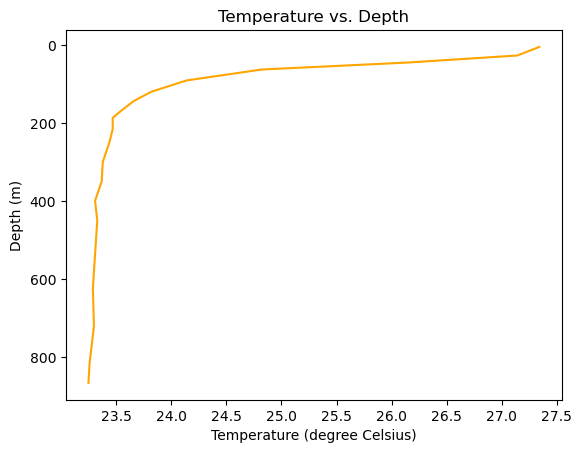

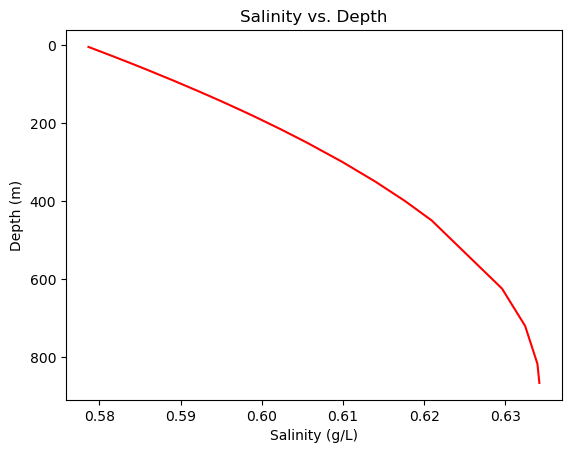

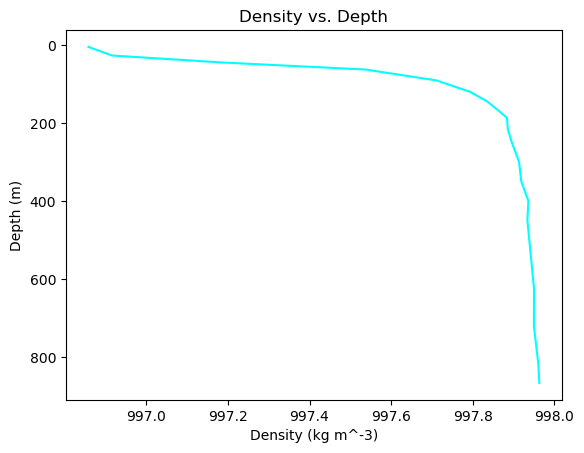

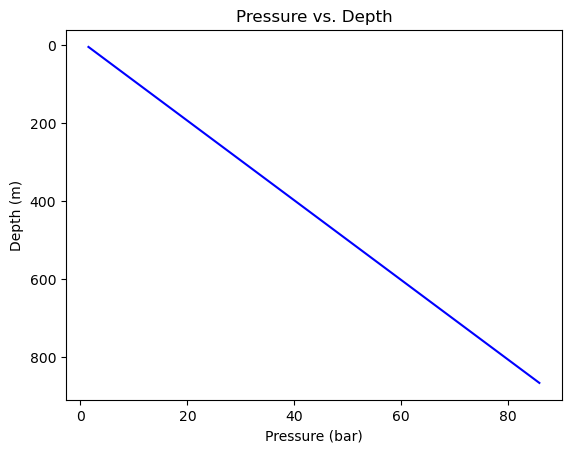

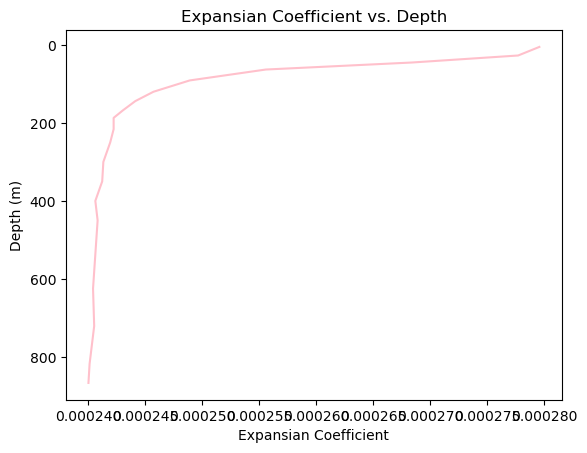

In [13]:
# TEMPERATURE
# plot the depth against the temperature in a graph
plt.plot(temperature_1, depth_1, color='orange')

# Add labels and a title
plt.xlabel('Temperature (degree Celsius)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

plt.title('Temperature vs. Depth')

# Show the plot
plt.show()



# SALINITY
# plot the depth against the salinity in a graph
plt.plot(salinity_1, depth_1, color='red')

# Add labels and a title
plt.xlabel('Salinity (g/L)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

plt.title('Salinity vs. Depth')

# Show the plot
plt.show()



# DENSITY
# plot the depth against the density in a graph
plt.plot(density, depth_1, color='cyan')

# Add labels and a title
plt.xlabel('Density (kg m^-3)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

plt.title('Density vs. Depth')

# Show the plot
plt.show()



# PRESSURE
# plot the depth against the pressure in a graph
plt.plot(pressure, depth_1, color='blue')

# Add labels and a title
plt.xlabel('Pressure (bar)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

plt.title('Pressure vs. Depth')

# Show the plot
plt.show()



# EXPANSIAN COEFFICIENT
# plot the depth against the expansian coefficient in a graph
plt.plot(expansian_coefficient, depth_1, color='pink')

# Add labels and a title
plt.xlabel('Expansian Coefficient')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

plt.title('Expansian Coefficient vs. Depth')

# Show the plot
plt.show()

To find the values for the specific isobaric heat capacity (C_p) and speed of sound (c_s) the following site was used: http://twt.mpei.ac.ru/mcs/worksheets/iapws/IAPWS95.xmcd.

In [14]:
print(density)
print(temperature_1)

[996.8585066218657, 996.9161739494125, 997.1875818485231, 997.5372376742142, 997.711174664482, 997.792800857599, 997.8339841665623, 997.8627088750987, 997.8836041416437, 997.8857730816808, 997.8954652660778, 997.9133075426661, 997.9187774778511, 997.9360250122162, 997.9337058975929, 997.9499079755055, 997.9496594332502, 997.9604264141826, 997.9630104204638]
[27.34, 27.14, 26.15, 24.82, 24.14, 23.82, 23.66, 23.55, 23.47, 23.47, 23.44, 23.38, 23.37, 23.31, 23.33, 23.29, 23.3, 23.26, 23.25]


In [15]:
C_p = [4.177752141556386E3, 4.177794381910913E3, 4.178082221069499E3, 4.178541553179622E3, 4.178798091567815E3, 
       4.178918168363946E3, 4.178975294547236E3, 4.179011693605513E3, 4.179038027095934E3, 4.179023921986732E3,
       4.179021691666388E3, 4.179027206257726E3, 4.179011867650344E3, 4.179021162979466E3, 4.178995732430827E3,
       4.178971250559169E3, 4.178952608334409E3, 4.178963496417631E3, 4.178966916754878E3]
       
c_s = [1504.4012741736135, 1503.9061413048282, 1501.3792051056191, 1497.8666185849977, 1496.0248322900609,
       1495.1506340026683, 1494.713294934124, 1494.4135166661301, 1494.195190226, 1494.203198640224,
       1494.128108344628, 1493.972114989181, 1493.9553128850687, 1493.796937356486, 1493.8624027236297, 
       1493.7741160704736, 1493.8102214639164, 1493.7018267662513, 1493.6743199387302]

The following way to find the speed of sound in water was thought of in paper:
https://sci-hub.se/10.1121/1.2988296

In [16]:
# longitude of the Tanganyika Lake is 30 degrees
phi = 30

In [17]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Coefficients Numerical values
C00 = 1402.388
C01 = 5.03830 
C02 = -5.81090E-2 
C03 = 3.3432E-4 
C04 = -1.47797E-6 
C05 = 3.1419E-9 
C10 = 0.153563 
C11 = 6.8999E-4 
C12 = -8.1829E-6 
C13 = 1.3632E-7 
C14 = -6.1260E-10 
C20 = 3.1260E-5 
C21 = -1.7111E-6 
C22 = 2.5986E-8 
C23 = -2.5353E-10 
C24 = 1.0415E-12 
C30 = -9.7729E-9 
C31 = 3.8513E-10 
C32 = -2.3654E-12 
A00 = 1.389       
A01 = -1.262E-2
A02 = 7.166E-5   
A03 = 2.008E-6   
A04 = -3.21E-8   
A10 = 9.4742E-5  
A11 = -1.2583E-5 
A12 = -6.4928E-8 
A13 = 1.0515E-8  
A14 = -2.0142E-10
A20 = -3.9064E-7 
A21 = 9.1061E-9  
A22 = -1.6009E-10
A23 = 7.994E-12  
A30 = 1.100E-10  
A31 = 6.651E-12  
A32 = -3.391E-13 
B00 = -1.922E-2  
B01 = -4.42E-5   
B10 = 7.3637E-5  
B11 = 1.7950E-7  
D00 = 1.727E-3   
D10 = -7.9836E-6


def c_chen(T,S,P):
    Cw = (C00 + C01*T + C02*T**2 + C03*T**3 + C04*T**4 + C05*T**5) + \
         (C10 + C11*T + C12*T**2 + C13*T**3 + C14*T**4)*P + \
         (C20 + C21*T + C22*T**2 + C23*T**3 + C24*T**4)*P**2 + \
         (C30 + C31*T + C32*T**2)*P**3
 
    A = (A00 + A01*T + A02*T**2 + A03*T**3 + A04*T**4) + \
        (A10 + A11*T + A12*T**2 + A13*T**3 + A14*T**4)*P + \
        (A20 + A21*T + A22*T**2 + A23*T**3)*P**2 + \
        (A30 + A31*T + A32*T**2)*P**3
    
    B = B00 + B01*T + (B10 + B11*T)*P
 
    D = D00 + D10*P 

    return Cw + A*S + B * pow(S,3./2) + D*S**2

def c(T, S, Z, phi):
    c = 1402.5 + 5*T - 5.44e-2 * T**2 + 2.1e-4 * T**3 \
        + 1.33*S - 1.23e-2 * S*T + 8.7e-5*S*T**2 \
        + 1.56e-2*Z + 2.55e-7 *Z**2 - 7.3e-12*Z**3 \
        + 1.2e-6 *Z*(phi-45.) - 9.5e-13 * T*Z**3 \
        + 3e-7*T**2 *Z + 1.43e-5*S*Z
    
    return c

In [18]:
# we want pressure in MPa instead of bar so we divide by ten
pressure_MPa = [i / 10 for i in pressure]

c_s_formula = []
c_s_chen = []

for i in range(0, len(depth_1)):
    speed_of_sound = c(temperature_1[i], salinity_1[i], depth_1[i], phi)
    speed_of_sound_chen = c_chen(temperature_1[i], salinity_1[i], pressure_MPa[i])
    c_s_formula.append(speed_of_sound)
    c_s_chen.append(speed_of_sound_chen)
    
print(c_s_formula)
print(c_s_chen)

[1503.5205965632852, 1503.3716684454378, 1501.139800800164, 1497.925227800713, 1496.528251247901, 1496.1104729978194, 1496.0500599624113, 1496.1270466792535, 1496.2071729801546, 1496.6700964847419, 1497.1293744570519, 1497.7607930892846, 1498.532756640735, 1499.16519115594, 1500.0226735118174, 1502.7202683582634, 1504.2929893931744, 1505.7432008727308, 1506.5051968731086]
[1503.4195844434123, 1502.9584928992206, 1500.4700096053177, 1497.0002701070575, 1495.2074154427678, 1494.379147056885, 1493.978625603642, 1493.7151642425097, 1493.5255901062335, 1493.5761466332149, 1493.551565284001, 1493.4705416523102, 1493.5287142946875, 1493.4465003111293, 1493.5878074199147, 1493.7710203618815, 1493.958892452468, 1494.0066378732956, 1494.0587697209417]


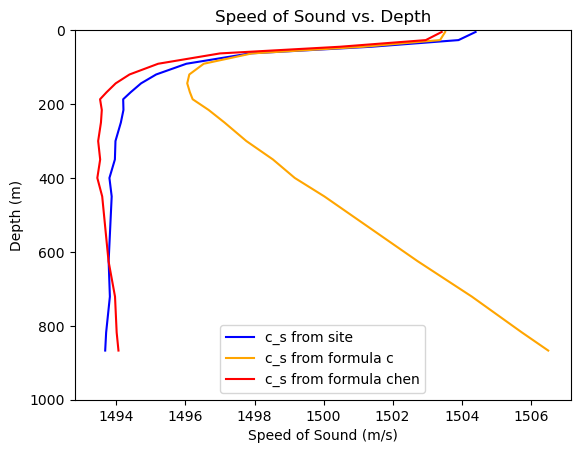

In [19]:
# SPEED OF SOUND
# plot the depth against the speed of sound in a graph
#plt.scatter(gruneisen_parameter, depth_1, color='red')
plt.plot(c_s, depth_1, color='blue', label = 'c_s from site')
plt.plot(c_s_formula, depth_1, color='orange', label='c_s from formula c')
plt.plot(c_s_chen, depth_1, color='red', label='c_s from formula chen')

# Add labels and a title
plt.xlabel('Speed of Sound (m/s)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.ylim(1000, 0)

plt.legend()
plt.title('Speed of Sound vs. Depth')

# Show the plot
plt.show()

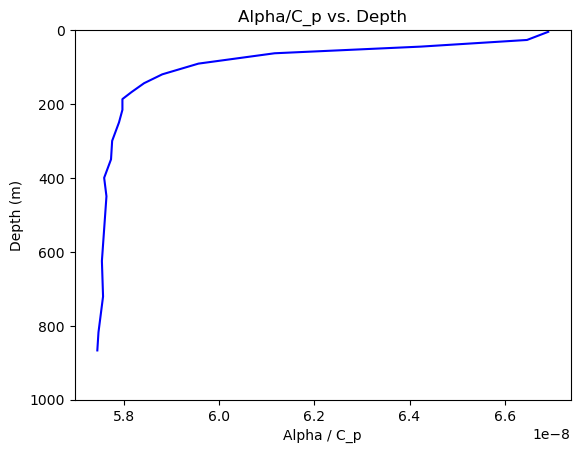

In [20]:
alphaC_p = [i / j for i, j in zip(expansian_coefficient, C_p)]

# alpha / C_p
# plot the depth against alpha/C_p of sound in a graph
#plt.scatter(gruneisen_parameter, depth_1, color='red')
plt.plot(alphaC_p, depth_1, color='blue')

# Add labels and a title
plt.xlabel('Alpha / C_p')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
plt.ylim(1000, 0)

plt.title('Alpha/C_p vs. Depth')

# Show the plot
plt.show()

In [21]:
gruneisen_parameter = []
gruneisen_parameter_formula = []
gruneisen_parameter_chen = []
gruneisen_parameter_check = []

for i in range(0, len(C_p)):
    gruneisen = (((c_s[i])**2) * expansian_coefficient[i]) / C_p[i]
    gruneisen_parameter.append(gruneisen)
    
for i in range(0, len(C_p)):
    gruneisen_formula = (((c_s_formula[i])**2) * expansian_coefficient[i]) / C_p[i]
    gruneisen_parameter_formula.append(gruneisen_formula)

for i in range(0, len(C_p)):
    gruneisen_chen = (((c_s_chen[i])**2) * expansian_coefficient[i]) / C_p[i]
    gruneisen_parameter_chen.append(gruneisen_chen)
    
for i in range(0, len(C_p)):
    gruneisen_check = ((c_s_formula[i])**2) * 5.7E-8
    gruneisen_parameter_check.append(gruneisen_check)
    
print(gruneisen_parameter)
print(gruneisen_parameter_formula)
print(gruneisen_parameter_chen)

[0.15144998283771122, 0.15034050168186774, 0.14479470076754866, 0.13722364617292448, 0.13330036481739185, 0.13144250734864138, 0.13051112936900133, 0.12987007775925932, 0.12940330774289643, 0.12940513163714049, 0.12923152884473066, 0.12888282147254876, 0.12882676670727639, 0.12847723781816098, 0.12859664394050704, 0.12836745271806013, 0.12842793611181472, 0.12819411035657557, 0.1281355456863991]
[0.15127271687644006, 0.15023366171718236, 0.14474852760767098, 0.1372343850832209, 0.13339009223368645, 0.13161132530961506, 0.13074467345754592, 0.13016807273354494, 0.12975203395347074, 0.12983277462566356, 0.12975122692527244, 0.1295373379407759, 0.1296174204610974, 0.12940231362519453, 0.12965942393014646, 0.1299096318376255, 0.13023673882436218, 0.1302692971972895, 0.13034640636236328]
[0.15125239142888827, 0.15015109484869868, 0.14461938619134765, 0.1370649549849178, 0.1331547359566974, 0.13130689557306977, 0.13038286535922852, 0.129748727287991, 0.12928735360805033, 0.12929654303107171,

In [22]:
T = temperature_1[18]
z = 1500

salinity = 0.578 + (0.001 * 1.28305 * 10**(-1) * z) - (0.001 * 7.32604 * 10**(-5) * z**2)

c_s_depth = c(T, salinity, 1500, phi)

gruneisen_depth = (((c_s_depth)**2) * expansian_coefficient[18]) / C_p[18]

gruneisen_parameter_depth = gruneisen_parameter_formula + [gruneisen_depth]

depth_depth = [5, 27, 45, 63, 91, 120, 144, 168, 187, 216, 250, 300, 350, 400, 450, 625, 721, 818, 867, 1500]

In [23]:
print(c_s_formula[0])
print(c_s_formula[len(C_p) - 1])

print(expansian_coefficient[0]/C_p[0])
print(expansian_coefficient[len(C_p) - 1]/C_p[len(C_p) - 1])

print(c_s_formula[0]**2 * expansian_coefficient[0]/C_p[0])
print(c_s_formula[len(C_p) - 1]**2 * expansian_coefficient[len(C_p) - 1]/C_p[len(C_p) - 1])

1503.5205965632852
1506.5051968731086
6.691782907533759e-08
5.743250960510426e-08
0.15127271687644006
0.13034640636236328


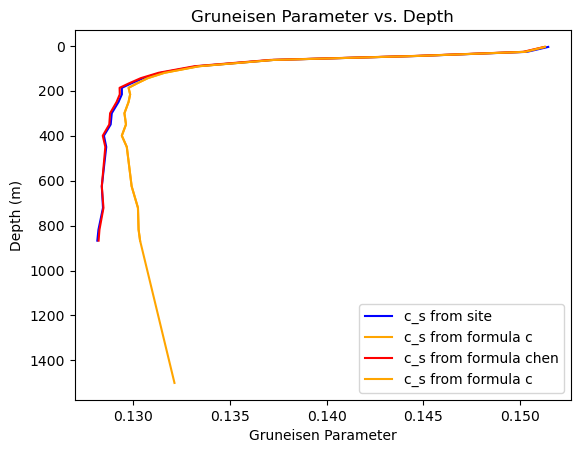

In [24]:
# GRUNEISEN PARAMETER
# plot the depth against the gruneisen parameter in a graph
#plt.scatter(gruneisen_parameter, depth_1, color='red')
plt.plot(gruneisen_parameter, depth_1, color='blue', label = 'c_s from site')
plt.plot(gruneisen_parameter_formula, depth_1, color='orange', label='c_s from formula c')
plt.plot(gruneisen_parameter_chen, depth_1, color='red', label='c_s from formula chen')
plt.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')

# Add labels and a title
plt.xlabel('Gruneisen Parameter')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()
#plt.xlim(-0.05, 0.2)
#plt.ylim(1600, 0)

plt.legend()
plt.title('Gruneisen Parameter vs. Depth')

# Show the plot
plt.show()

## GSW Package


There is a python package in which a source code is available with which you can determine water parameters at https://teos-10.org/. 

The citation is the following:

@book{mcdougall2011getting,
  author = {McDougall, T. J. and Barker, P. M.},
  title = {Getting started with TEOS-10 and the Gibbs Seawater (GSW) Oceanographic Toolbox},
  year = {2011},
  pages = {28},
  publisher = {SCOR/IAPSO WG127},
  isbn = {978-0-646-55621-5}
}

In [25]:
pip install gsw

Note: you may need to restart the kernel to use updated packages.


In [26]:
import gsw

### Conservative Temperature

In [52]:
# absolute salinity in g/kg
SA = salinity_1

# in-situ temperature in C
t = temperature_1

# pressure in dbar
p = [i * 10 for i in pressure]

print(gsw)

# find conservative temperature
CT = gsw.CT_from_t(SA, t, p)

print(CT)

<module 'gsw' from 'C:\\Users\\rootselaarlv\\AppData\\Local\\anaconda3\\Lib\\site-packages\\gsw\\__init__.py'>
[28.70731982 28.49342543 27.45403789 26.05918482 25.34258716 25.00252676
 24.83080187 24.7114022  24.62430868 24.61902096 24.58147644 24.5097002
 24.49016226 24.41844609 24.43022563 24.35667753 24.34960048 24.29028291
 24.27094671]


### Thermal Expansion Coefficient

In [28]:
alpha = gsw.alpha(SA, CT, p)

print(alpha)

[0.00026774 0.00026622 0.00025763 0.00024578 0.00023987 0.00023727
 0.0002361  0.00023539 0.00023489 0.00023527 0.00023545 0.00023555
 0.00023612 0.00023623 0.00023707 0.00023901 0.00024036 0.00024127
 0.00024182]


### Speed of Sound

In [29]:
sound_speed = gsw.sound_speed(SA, CT, p)

print(depth_1)
print(sound_speed)

[5, 27, 45, 63, 91, 120, 144, 168, 187, 216, 250, 300, 350, 400, 450, 625, 721, 818, 867]
[1503.70080892 1503.56155991 1501.32232233 1498.09483493 1496.70097556
 1496.29180006 1496.23965424 1496.32530449 1496.41213436 1496.88698634
 1497.35919944 1498.00828567 1498.79773457 1499.44542533 1500.31889556
 1503.06190468 1504.65554669 1506.12200501 1506.89132376]


### Isobaric Heat Capacity

In [55]:
cp_t_exact = gsw.cp_t_exact(SA, t, p)

SA_hoog = [i *100 for i in SA]
t_hoog = [i *2 for i in t]

p_hoog = [i *100 for i in p]
lala = gsw.cp_t_exact(SA_hoog, t, p)
lala1 = gsw.cp_t_exact(SA, t_hoog, p)

lala2 = gsw.cp_t_exact(SA, t, p_hoog)

print(cp_t_exact)
print(lala)
print(p)
print(lala1)
print(lala2)

[4176.79701551 4176.23798367 4176.03217983 4175.98125126 4175.4336183
 4174.71852775 4174.08457832 4173.43065947 4172.91026338 4172.06987321
 4171.09861403 4169.68045518 4168.2509518  4166.84364165 4165.41823345
 4160.5162158  4157.85617172 4155.20283123 4153.87014074]
[3894.56043891 3892.72579321 3890.53405137 3888.01845429 3885.37276993
 3883.04310016 3881.25847062 3879.56229566 3878.25484925 3876.4289413
 3874.33416549 3871.38500627 3868.6602227  3866.05811583 3863.70869193
 3856.71117512 3853.77607332 3851.37756061 3850.41050197]
[14.887921236981661, 36.39539675532842, 53.995326592444655, 71.60073792868005, 98.99412190868583, 127.36947504793858, 150.8539711415672, 174.3392899113476, 192.93229621286596, 221.31142326942927, 254.58370100720245, 303.51419626186464, 352.44526305328077, 401.3768868003788, 450.3088765419455, 621.5720319093459, 715.5228566744455, 810.4528361448178, 858.4074764458124]
[4178.09554333 4177.59159118 4176.99716817 4176.16616904 4175.27013563
 4174.47962938 4173

### Grüneisen Parameter

In [31]:
gruneisen_parameter_gsw = []

for i in range(0, len(C_p)):
    gruneisen = (((sound_speed[i])**2) * alpha[i]) / cp_t_exact[i]
    gruneisen_parameter_gsw.append(gruneisen)
    
print(gruneisen_parameter_gsw)

[0.144940292629789, 0.1441122743321497, 0.13905154346458934, 0.1320916749173999, 0.12868926701909209, 0.12724813544170233, 0.12662772206665915, 0.126281326696468, 0.12604600489789472, 0.12635768179310844, 0.1265586607706613, 0.12676780601095108, 0.12725179189833363, 0.12746259679999994, 0.12811175249211432, 0.12978522612908006, 0.13087893516896637, 0.13171342463068722, 0.13219096996813454]


In [32]:
# calculate a point at depth 1500
z = 1500

t_depth = temperature_1[18]
p_depth = p = gsw.p_from_z(-z, -6.5)

SA_depth = 0.578 + (0.001 * 1.28305 * 10**(-1) * z) - (0.001 * 7.32604 * 10**(-5) * z**2)

# use the gsw module
CT_depth = gsw.CT_from_t(SA_depth, t_depth, p_depth)
alpha_depth = gsw.alpha(SA_depth, CT_depth, p_depth)
sound_speed_gsw_depth = gsw.sound_speed(SA_depth, CT_depth, p_depth)
cp_t_exact_depth = gsw.cp_t_exact(SA_depth, t_depth, p_depth)

# calculate grüneisen parameter
gruneisen_gsw_depth = (((sound_speed_gsw_depth)**2) * alpha_depth) / cp_t_exact_depth

gruneisen_parameter_gsw_depth = gruneisen_parameter_gsw + [gruneisen_gsw_depth]

depth_depth = [5, 27, 45, 63, 91, 120, 144, 168, 187, 216, 250, 300, 350, 400, 450, 625, 721, 818, 867, 1500]

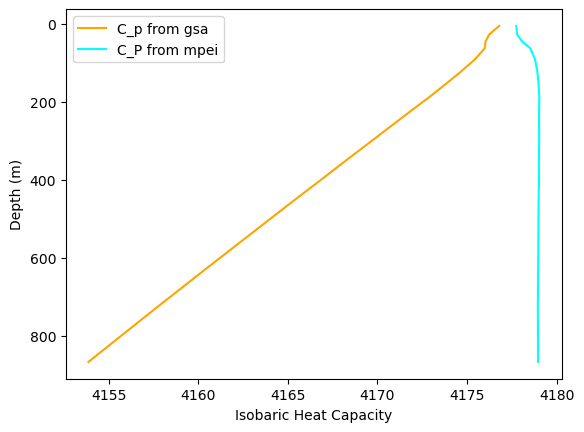

In [33]:
# Compare both heat capacities with one another
fig, ax = plt.subplots()

ax.plot(cp_t_exact, depth_1, color='orange', label='C_p from gsa')
ax.plot(C_p, depth_1, color='cyan', label='C_P from mpei')

ax.set_xlabel('Isobaric Heat Capacity')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()

ax.legend()

plt.show()

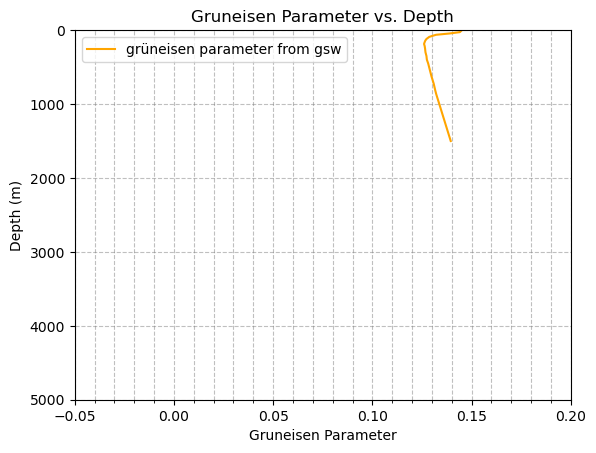

The predicted grüneisen parameter at a depth of 1500 meter in the Tanganyika lake is 0.13948808361402296.


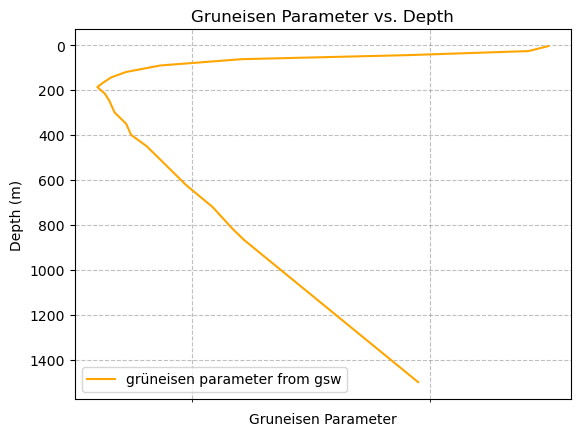

In [34]:
# GRUNEISEN PARAMETER
fig, ax = plt.subplots()

# plot the depth against the gruneisen parameter in a graph
# plt.scatter(gruneisen_parameter, depth_1, color='red')
#ax.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')
ax.plot(gruneisen_parameter_gsw_depth, depth_depth, color='orange', label='grüneisen parameter from gsw')


# Add labels and a title
ax.set_xlabel('Gruneisen Parameter')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.set_xlim(-0.05, 0.2)
ax.set_ylim(5000, 0)

ax.legend()
ax.set_title('Gruneisen Parameter vs. Depth')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()

print(f"The predicted grüneisen parameter at a depth of 1500 meter in the Tanganyika lake is {gruneisen_gsw_depth}.")

# GRUNEISEN PARAMETER
fig, ax = plt.subplots()

# plot the depth against the gruneisen parameter in a graph
# plt.scatter(gruneisen_parameter, depth_1, color='red')
#ax.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')
ax.plot(gruneisen_parameter_gsw_depth, depth_depth, color='orange', label='grüneisen parameter from gsw')


# Add labels and a title
ax.set_xlabel('Gruneisen Parameter')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()

ax.legend()
ax.set_title('Gruneisen Parameter vs. Depth')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()

In [35]:
print(CT)

print(SA)

[28.70731982 28.49342543 27.45403789 26.05918482 25.34258716 25.00252676
 24.83080187 24.7114022  24.62430868 24.61902096 24.58147644 24.5097002
 24.49016226 24.41844609 24.43022563 24.35667753 24.34960048 24.29028291
 24.27094671]
[0.57863969349, 0.5814108281684, 0.5836253726899999, 0.5857924444724, 0.5890690856276, 0.59234165024, 0.5949567923456, 0.5974875384703999, 0.5994311920724, 0.6022958427776, 0.605497475, 0.609898064, 0.613932351, 0.617600336, 0.620902019, 0.6295732812499999, 0.6324241454036, 0.6339331981103999, 0.6341713981843999]


# Mediteranean Sea

The temperatures and salinities are taken from the following paper on page 88:
https://www.sincem.unibo.it/images/tesi/tesi_giusti.pdf


Additional temperatures are taken from:
https://www.researchgate.net/publication/269628883_Seasonal_cycle_of_the_Mixed_Layer_the_Seasonal_Thermocline_and_the_Upper-Ocean_Heat_Storage_Rate_in_the_Mediterranean_Sea_derived_from_observations/link/5c6a9f18a6fdcc404eb7a3a3/download


Also from:
https://www.mdpi.com/2673-1924/2/1/4

In [36]:
# I have taken the month October

# depth in m
depth_M = [0, 25, 50, 75, 90, 100, 150, 500, 1000]
# temperature in degrees Celsius
t_M = [20.6, 19.3, 16.9, 14.2, 13.9, 13.8, 13.7, 13.4, 13.2]
# salinity in psu
salinity_M = [37.81, 37.85, 37.9, 38.00, 38.02, 38.1, 38.25, 38.52, 38.48]

In [37]:
# find the absolute salinity
z = [-i for i in depth_M]
p_M = gsw.p_from_z(z, 42.72)
SA_M = gsw.SA_from_SP(salinity_M, p_M, 4.4386, 42.72)

print(p_M)
print(SA_M)

[  -0.           25.20080155   50.40468591   75.61165179   90.73730993
  100.82169793  151.25102595  504.60031595 1010.42408199]
[37.99073761 38.03072889 38.08103118 38.18145929 38.20173104 38.28223481
 38.4324831  38.70352153 38.66356468]


In [38]:
# find conservative temperature
CT_M = gsw.CT_from_t(SA_M, t_M, p_M)

print(CT_M)

[20.50256688 19.19991336 16.80144685 14.10512996 13.80369137 13.70072816
 13.59023405 13.23367918 12.96078413]


In [39]:
alpha_M = gsw.alpha(SA_M, CT_M, p_M)

print(alpha_M)

[0.00026658 0.00025637 0.00023671 0.00021373 0.00021132 0.00021074
 0.00021095 0.00021453 0.00022088]


In [40]:
sound_speed_M = gsw.sound_speed(SA_M, CT_M, p_M)

print(sound_speed_M)

[1526.1641276  1523.07609121 1516.65415601 1508.87374928 1508.18366911
 1508.12100824 1508.79805363 1513.91431425 1521.4932753 ]


In [41]:
cp_t_exact_M = gsw.cp_t_exact(SA_M, t_M, p_M)

print(cp_t_exact_M)

[3982.57647227 3980.90858403 3978.35748999 3975.22680244 3974.5159845
 3973.77666068 3971.67061598 3961.32159848 3949.23738495]


In [42]:
gruneisen_parameter_gsw_M = []

for i in range(0, len(cp_t_exact_M)):
    gruneisen_M = (((sound_speed_M[i])**2) * alpha_M[i]) / cp_t_exact_M[i]
    gruneisen_parameter_gsw_M.append(gruneisen_M)
    
print(gruneisen_parameter_gsw_M)

[0.1559057459349285, 0.14939389537265174, 0.13686395532235573, 0.12240537814903106, 0.12094024836592158, 0.1206214776953496, 0.12091370814650818, 0.12412362253962132, 0.1294724849634464]


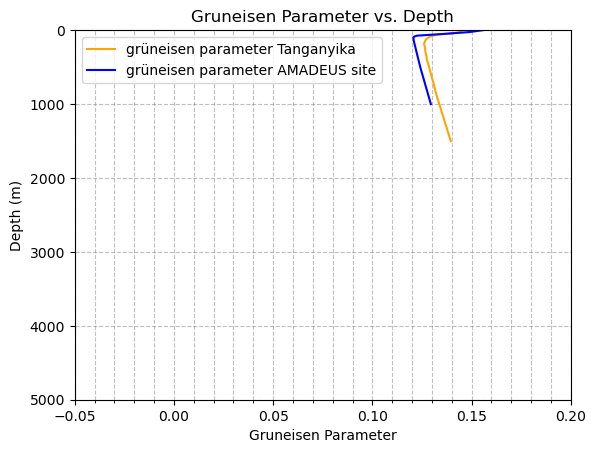

The predicted grüneisen parameter at a depth of 1500 meter in the Tanganyika lake is 0.13948808361402296.


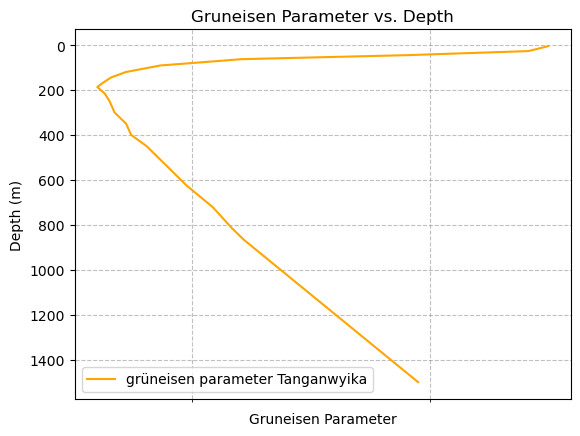

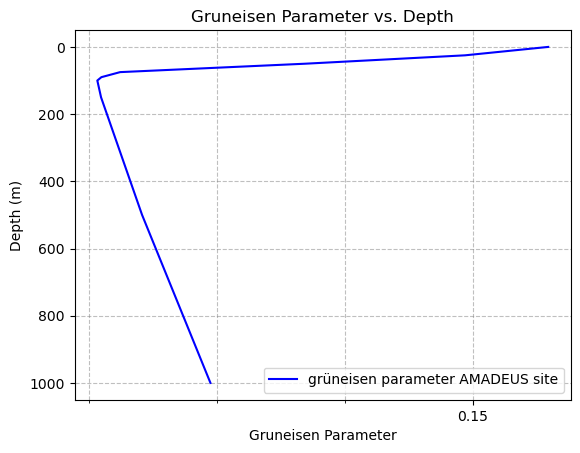

In [43]:
# GRUNEISEN PARAMETER
fig, ax = plt.subplots()

# plot the depth against the gruneisen parameter in a graph
# plt.scatter(gruneisen_parameter, depth_1, color='red')
#ax.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')
ax.plot(gruneisen_parameter_gsw_depth, depth_depth, color='orange', label='grüneisen parameter Tanganyika')
ax.plot(gruneisen_parameter_gsw_M, depth_M, color='blue', label='grüneisen parameter AMADEUS site')


# Add labels and a title
ax.set_xlabel('Gruneisen Parameter')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.set_xlim(-0.05, 0.2)
ax.set_ylim(5000, 0)

ax.legend()
ax.set_title('Gruneisen Parameter vs. Depth')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()

print(f"The predicted grüneisen parameter at a depth of 1500 meter in the Tanganyika lake is {gruneisen_gsw_depth}.")

# GRUNEISEN PARAMETER
fig, ax = plt.subplots()

# plot the depth against the gruneisen parameter in a graph
# plt.scatter(gruneisen_parameter, depth_1, color='red')
#ax.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')
ax.plot(gruneisen_parameter_gsw_depth, depth_depth, color='orange', label='grüneisen parameter Tanganwyika')


# Add labels and a title
ax.set_xlabel('Gruneisen Parameter')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()

ax.legend()
ax.set_title('Gruneisen Parameter vs. Depth')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()


fig, ax = plt.subplots()

# plot the depth against the gruneisen parameter in a graph
# plt.scatter(gruneisen_parameter, depth_1, color='red')
#ax.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')
ax.plot(gruneisen_parameter_gsw_M, depth_M, color='blue', label='grüneisen parameter AMADEUS site')


# Add labels and a title
ax.set_xlabel('Gruneisen Parameter')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()

ax.legend()
ax.set_title('Gruneisen Parameter vs. Depth')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()

# COMPARISON PARAMETERS TANGANYIKA AND AMADEUS SITE

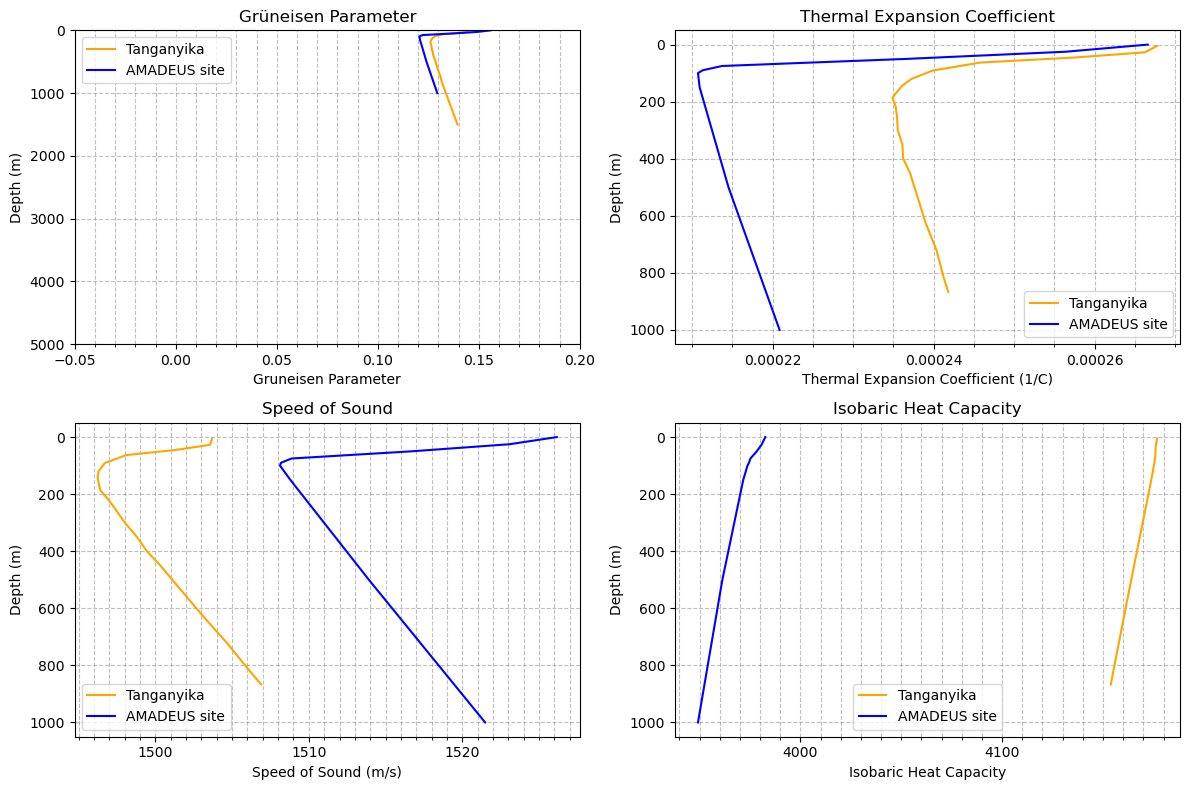

In [44]:
# make figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Grüneisen Parameter
axs[0,0].plot(gruneisen_parameter_gsw_depth, depth_depth, color='orange', label='Tanganyika')
axs[0,0].plot(gruneisen_parameter_gsw_M, depth_M, color='blue', label='AMADEUS site')

# Add labels and a title
axs[0,0].set_xlabel('Gruneisen Parameter')
axs[0,0].set_ylabel('Depth (m)')
axs[0,0].invert_yaxis()
axs[0,0].set_xlim(-0.05, 0.2)
axs[0,0].set_ylim(5000, 0)

axs[0,0].legend()
axs[0,0].set_title('Grüneisen Parameter')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
axs[0,0].xaxis.set_major_locator(major_locator)
axs[0,0].xaxis.set_minor_locator(minor_locator)
axs[0,0].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)



# Speed of Sound
axs[1,0].plot(sound_speed, depth_1, color='orange', label='Tanganyika')
axs[1,0].plot(sound_speed_M, depth_M, color='blue', label='AMADEUS site')

# Add labels and a title
axs[1,0].set_xlabel('Speed of Sound (m/s)')
axs[1,0].set_ylabel('Depth (m)')
axs[1,0].invert_yaxis()

axs[1,0].legend()
axs[1,0].set_title('Speed of Sound')

# Customize grid intervals
major_locator = MultipleLocator(10)  # Set the major grid interval
minor_locator = MultipleLocator(1)  # Set the minor grid interval
axs[1,0].xaxis.set_major_locator(major_locator)
axs[1,0].xaxis.set_minor_locator(minor_locator)
axs[1,0].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)



# Thermal Expansion Coëfficient
axs[0,1].plot(alpha, depth_1, color='orange', label='Tanganyika')
axs[0,1].plot(alpha_M, depth_M, color='blue', label='AMADEUS site')

# Add labels and a title
axs[0,1].set_xlabel('Thermal Expansion Coefficient (1/C)')
axs[0,1].set_ylabel('Depth (m)')
axs[0,1].invert_yaxis()

axs[0,1].legend()
axs[0,1].set_title('Thermal Expansion Coefficient')

# Customize grid intervals
major_locator = MultipleLocator(0.00002)  # Set the major grid interval
minor_locator = MultipleLocator(0.000005)  # Set the minor grid interval
axs[0,1].xaxis.set_major_locator(major_locator)
axs[0,1].xaxis.set_minor_locator(minor_locator)
axs[0,1].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)



# Isobaric Heat Capacity
axs[1,1].plot(cp_t_exact, depth_1, color='orange', label='Tanganyika')
axs[1,1].plot(cp_t_exact_M, depth_M, color='blue', label='AMADEUS site')

# Add labels and a title
axs[1,1].set_xlabel('Isobaric Heat Capacity')
axs[1,1].set_ylabel('Depth (m)')
axs[1,1].invert_yaxis()

axs[1,1].legend()
axs[1,1].set_title('Isobaric Heat Capacity')

# Customize grid intervals
major_locator = MultipleLocator(100)  # Set the major grid interval
minor_locator = MultipleLocator(10)  # Set the minor grid interval
axs[1,1].xaxis.set_major_locator(major_locator)
axs[1,1].xaxis.set_minor_locator(minor_locator)
axs[1,1].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)



plt.tight_layout()

plt.savefig('grüneisen.png')

# Show the plot
plt.show()




# SOURCES

Thermodynamic properties of sea water: 
https://www.researchgate.net/publication/289966693_THERMODYNAMICS_OF_SEAWATER_-_1_THE_PVT_PROPERTIES

Temperature of lake Tanganyika: https://www.researchgate.net/publication/10687739_Ecological_consequences_of_warming_in_Lake_Tanganyika

Grüneisen Parameter (Acoustic search for high-energy neutrinos in the Lake Baikal: Results and plans): https://www.sciencedirect.com/science/article/pii/S0168900210027002

Thermodynamics with the Grüneisen parameter: Fundamentals and applications to high pressure physics and geophysics:
https://www.sciencedirect.com/science/article/abs/pii/S0031920118301705

The density of artificial river and estuarine waters:
https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JC081i006p01177

Lake Tanganyika; Water Chemistry, Sediments, Geological Structure:
https://link.springer.com/content/pdf/10.1007/BF00602986.pdf

Lake Tanganyika Geochemical and Hydrographic Study:
https://escholarship.org/content/qt4ct114wz/qt4ct114wz_noSplash_ad2bbf2b98876465fa063ff4c8248bdc.pdf

The interpretation of temperature and salinity variables in numerical ocean model output and the calculation of heat fluxes and heat content:
https://gmd.copernicus.org/articles/14/6445/2021/

Evaluation of the Thermal Expansion Coefficient Using Non-Destructive Testing:
https://www.researchgate.net/figure/The-volumetric-coefficient-of-thermal-expansion-of-water-as-a-function-of-temperature_fig5_283292378

A simple molecular thermodynamic theory of hydrophobic hydration:
https://www.researchgate.net/publication/234925177_A_simple_molecular_thermodynamic_theory_of_hydrophobic_hydration